In [1]:
import cv2
import os
import pandas as pd 
import numpy as np
import re

In [5]:
fixed_size = tuple((500, 500))

In [2]:
listing = os.listdir("./images")
listing

['sEXlAvG-cJc', '.DS_Store', 'olGYGmIBedw', 'YkrixH_PQto']

In [3]:
rootdir = "./images"
def frame(x):
    return int(re.findall('[0-9]+', x)[0])


In [6]:
dictOfVideo = {} ##Make a Dictionary
for subdir, dirs, files in os.walk(rootdir):
    
     ##OR it can equal the input of something, up to you.
    df = pd.DataFrame(columns = ['frame','r_mean', 'g_mean', 'b_mean','r_median', 'g_median', 'b_median']) 
    
    for file in files:
        # read the image and resize it to a fixed-size
#         print(subdir)
        name = str(subdir).split('/')
        video = name[len(name)-1]
#         print(video)
        dir = subdir + "/" + file
#         print(file)
        try:
            img = cv2.imread(dir)
            img = cv2.resize(img, fixed_size)
            ####################################
            # Global Feature extraction
            ####################################
            rgb_mean = img.reshape(-1,3).mean(axis = 0)
            rgb_median = np.median(img.reshape(-1,3),axis = 0)
        
            df_length = len(df)
            df.loc[df_length] = np.concatenate((frame(file),rgb_mean, rgb_median), axis=None)
            
            
        except cv2.error as e:
            print('Invalid frame!')
            
        
        
    print("[STATUS] processed folder: {}".format(subdir))
    if not df.empty:
        df = df.sort_values(by=['frame'])
        df['frame_index'] = range(len(df))
        dictOfVideo[video] = df
print("[STATUS] completed Global Feature Extraction...")

Invalid frame!
[STATUS] processed folder: ./images
[STATUS] processed folder: ./images/sEXlAvG-cJc
[STATUS] processed folder: ./images/olGYGmIBedw
[STATUS] processed folder: ./images/YkrixH_PQto
[STATUS] completed Global Feature Extraction...


In [8]:
dictOfVideo['sEXlAvG-cJc']

,frame,r_mean,g_mean,b_mean,r_median,g_median,b_median,frame_index
3,30.0,121.378056,133.194900,149.611052,113.0,152.0,158.0,0
9,60.0,121.047344,132.586432,148.090412,111.0,149.0,156.0,1
1,90.0,120.407764,131.921840,147.168152,110.0,148.0,145.0,2
4,120.0,120.840904,132.485276,147.710688,111.0,149.0,148.0,3
0,150.0,120.445460,132.237044,147.485104,110.0,148.0,156.0,4
2,180.0,120.452088,132.640708,148.388228,112.0,150.0,150.0,5
8,210.0,121.840264,134.215432,150.315964,114.0,154.0,164.0,6
5,240.0,121.664688,134.014780,150.115544,114.0,153.0,165.0,7
6,270.0,122.327320,134.766288,150.961944,115.0,154.0,168.0,8
7,300.0,122.270608,134.733336,150.978916,115.0,154.0,168.0,9


In [68]:
design_matrix = pd.DataFrame(columns = ['videoid','conspiracy','mean_r','mean_g','mean_b','var_r','var_g','var_b'])

for i,id in enumerate(dictOfVideo):
    df_length = len(design_matrix)
    df = dictOfVideo[id]
    #get meta-data
    conspiracy_type = getConspiracy(id)
    r_mean = df['r_mean'].mean()
    g_mean = df['g_mean'].mean()
    b_mean = df['b_mean'].mean()
    
    r_var = df['r_mean'].var()
    g_var = df['g_mean'].var()
    b_var = df['b_mean'].var()
    
    
    design_matrix.loc[df_length] = np.concatenate(( id, conspiracy_type, r_mean, g_mean,b_mean,
                                                  r_var,g_var,b_var), axis=None)
    
    

In [78]:
type(design_matrix)

pandas.core.frame.DataFrame

In [82]:
design_matrix.columns

Index(['videoid', 'conspiracy', 'mean_r', 'mean_g', 'mean_b', 'var_r', 'var_g',
       'var_b'],
      dtype='object')

In [24]:
conspiracyVideo = pd.read_excel("COVID19_youtube_dataset.xlsx", usecols="A,P,Q")

In [27]:
conspiracyVideo

,video_id,Relevancy,Attitude
0,NcSUF8erpfU,1,0.0
1,V0yb0_a-WNc,1,0.0
2,BkbztWS4-9I,1,0.0
3,qB-mhVnKtSU,1,0.0
4,7OVT3N5_4to,1,0.0
...,...,...,...
2689,FCMOSikDBqg,0,NaN
2690,_NTPb8JHlzU,0,NaN
2691,yiMdcEVeJJA,0,NaN
2692,ZrALSL8AuGk,0,NaN


In [87]:
design_matrix

,videoid,conspiracy,mean_r,mean_g,mean_b,var_r,var_g,var_b
0,sEXlAvG-cJc,1,121.2674496,133.27960360000003,149.0826004,0.5486365439367114,1.1330095036816037,2.1734673860353775
1,olGYGmIBedw,1,221.7067884914286,220.71146278857137,226.51524731428572,985.302739951401,878.8328920538164,575.4249045954821
2,YkrixH_PQto,1,95.72901702368816,97.00147127916041,99.68206810854574,4318.00019845189,4249.540792265893,4140.4725830143025


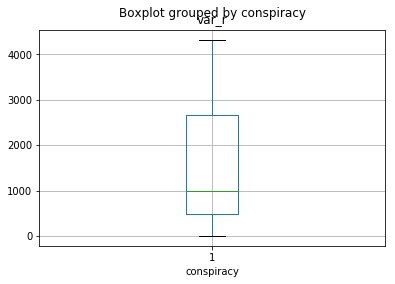

In [92]:
design_matrix['conspiracy'] = design_matrix['conspiracy'].astype('category')
design_matrix['mean_r'] = des+
ign_matrix['mean_r'].astype('float')
design_matrix['var_r'] = design_matrix['var_r'].astype('float')


design_matrix.boxplot(column='var_r',by='conspiracy')

In [67]:
def getConspiracy(videoId):
    row = conspiracyVideo.loc[conspiracyVideo['video_id']==videoId,'Attitude']
    if row.empty:
        return None 
    return 1 if row.values[0] == 1 else 0

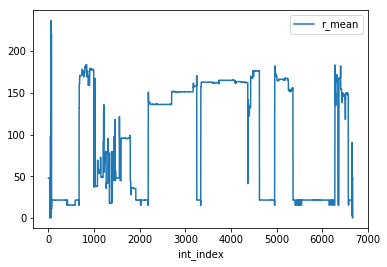

In [48]:
import matplotlib.pyplot as plt
# df.plot(x="frame", y=['r_mean', 'g_mean', 'b_mean','r_median', 'g_median', 'b_median',
#                                                 'hue_mean', 'sat_mean', 'val_mean','hue_median', 'sat_median', 'val_median'])
df = df.sort_values(by=['frame'])
df['int_index'] = range(len(df))
df.plot(x="int_index", y=['r_mean'])

df.drop('int_index', axis=1, inplace=True)
plt.show()

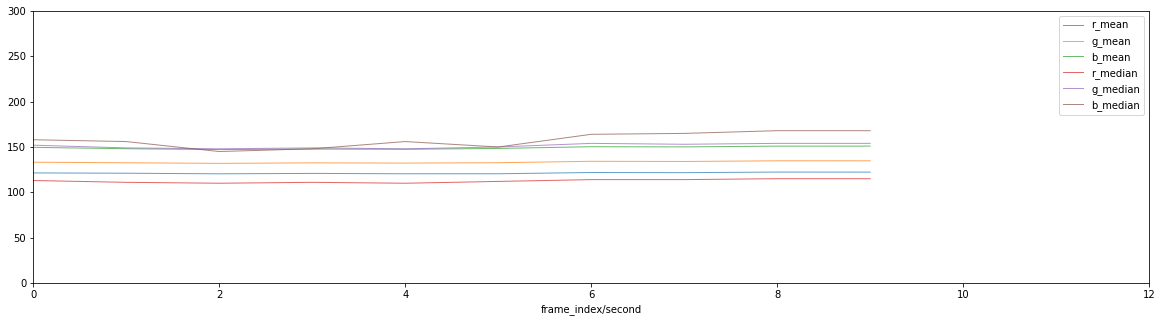

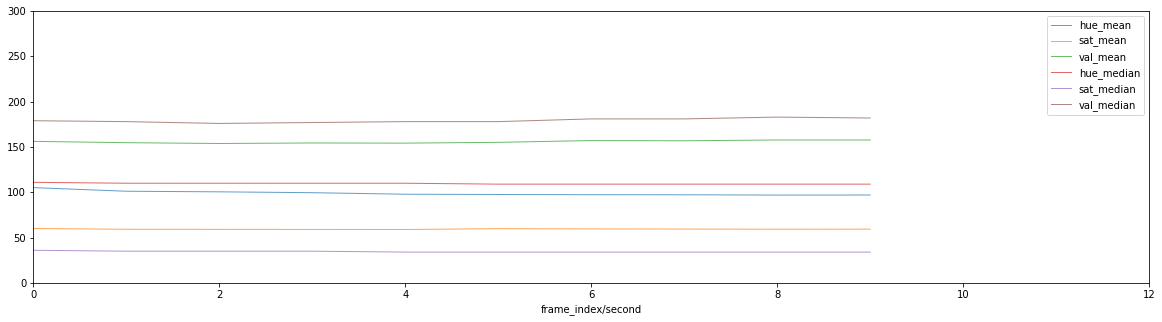

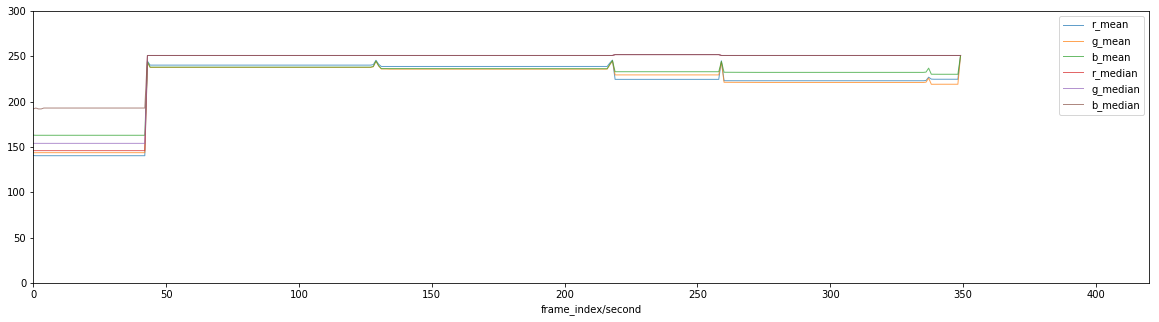

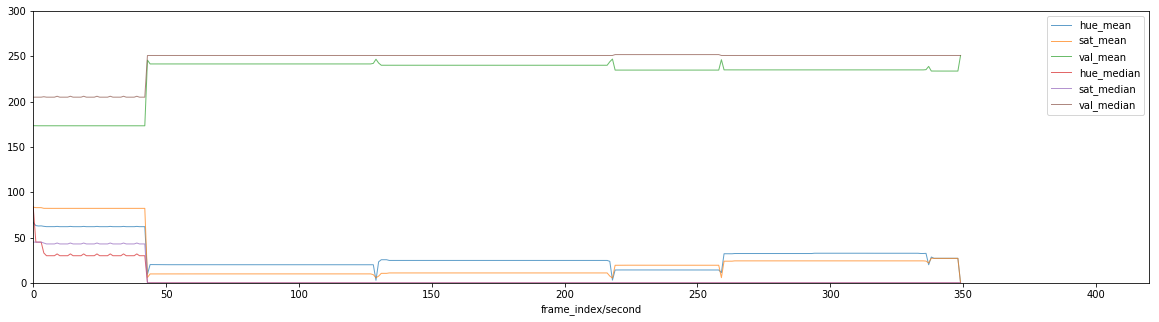

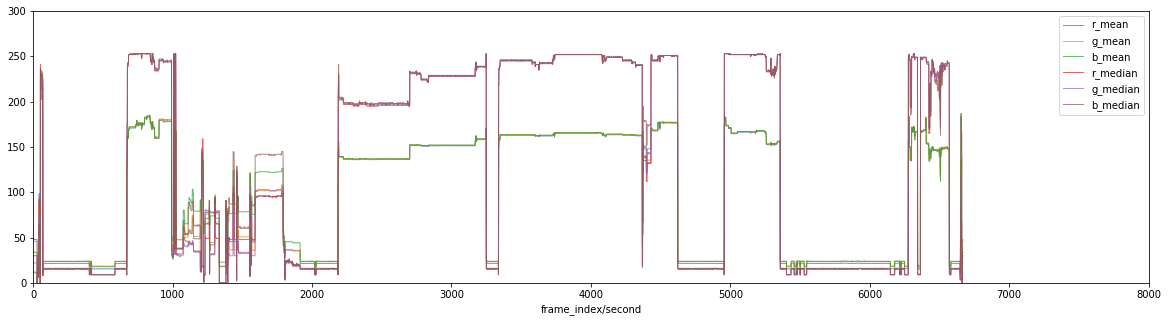

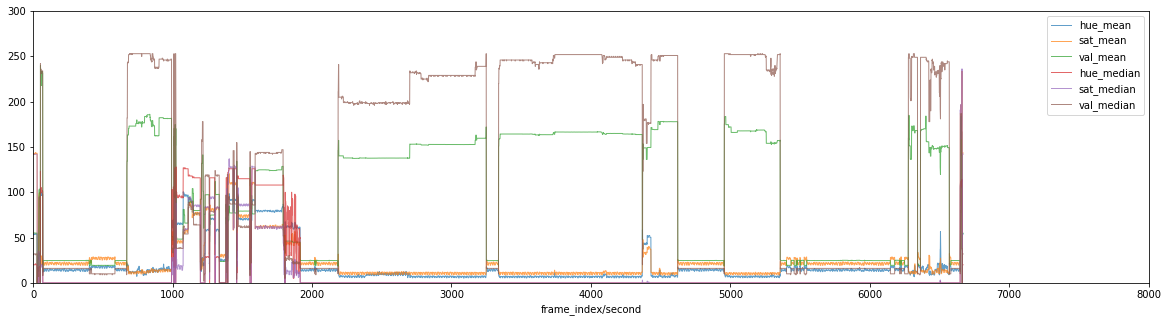

In [83]:
from numpy import arange
for key, vid in dictOfStuff.items():
    if not vid.empty:
        vid = vid.sort_values(by=['frame'])
        vid['frame_index'] = range(len(vid))
#         plt.figure(f)
        vid.plot(x="frame_index", y=['r_mean', 'g_mean', 'b_mean','r_median', 'g_median', 'b_median'],linewidth = 1, alpha=0.7,figsize = (20,5))
        #         print(len(vid))
        
        plt.xlim([0, 1.2 * len(vid)])
        plt.ylim([0, 300])
        plt.xlabel('frame_index/second')
        plt.savefig( 'rgb'+ str(len(vid))+'_'+ key + '.pdf')
        plt.show()
        
        vid.plot(x="frame_index", y=['hue_mean', 'sat_mean', 'val_mean','hue_median', 'sat_median', 'val_median'],
                                 linewidth = 1, alpha=0.7,figsize = (20,5))
        #         print(len(vid))
        plt.xlim([0, 1.2 * len(vid)])
        plt.ylim([0, 300])
        plt.xlabel('frame_index/second')
        plt.savefig('hsv'+ str(len(vid))+'_'+ key + '.pdf')
        

        plt.show()
        
        

In [22]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

AttributeError: 'numpy.ndarray' object has no attribute 'convert'

In [25]:
img = cv2.imread("./images/olGYGmIBedw/frame125.jpg")

In [29]:
rgb_mean = img.reshape(-1,3).mean(axis = 0)
rgb_median = np.median(img.reshape(-1,3),axis = 0)

In [31]:
rgb_median

array([147., 156., 194.])

In [32]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [35]:
hsv_mean = hsv_img.reshape(-1,3).mean(axis = 0)
hsv_median = np.median(hsv_img.reshape(-1,3),axis = 0)

In [37]:
hsv_mean

array([ 30.,  44., 208.])

In [38]:
hsv_mean

array([ 61.65499132,  84.37317708, 173.58034288])

In [39]:
np.concatenate((hsv_mean, rgb_median), axis=None)

array([ 61.65499132,  84.37317708, 173.58034288, 147.        ,
       156.        , 194.        ])

In [11]:
file_list = os.listdir("./images/sEXlAvG-cJc")
file_list

['frame150.jpg',
 'frame90.jpg',
 'frame180.jpg',
 'frame30.jpg',
 'frame120.jpg',
 'frame240.jpg',
 'frame270.jpg',
 'frame300.jpg',
 'frame210.jpg',
 'frame60.jpg']

In [12]:
sorted(file_list)

['frame120.jpg',
 'frame150.jpg',
 'frame180.jpg',
 'frame210.jpg',
 'frame240.jpg',
 'frame270.jpg',
 'frame30.jpg',
 'frame300.jpg',
 'frame60.jpg',
 'frame90.jpg']

In [33]:
frame('frame120.jpg')

120

In [34]:
sorted(file_list, key = frame)

['frame30.jpg',
 'frame60.jpg',
 'frame90.jpg',
 'frame120.jpg',
 'frame150.jpg',
 'frame180.jpg',
 'frame210.jpg',
 'frame240.jpg',
 'frame270.jpg',
 'frame300.jpg']